In [115]:
import pandas as pd 
df =pd.read_csv("E:\MACHINE LEARNING\datasets\IMDB Dataset.csv")
df.shape[0]


50000

In [116]:
df.duplicated().sum()

418

In [117]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [118]:
df.shape

(49582, 2)

In [119]:
df['review'][0] # the first review 

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [120]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])
df['sentiment'].shape

(49582,)

In [121]:
def make_lower(text): 
    return text.lower()

In [ ]:
!pip install lxml

In [ ]:
from lxml import html

def remove_tags(text): 
    doc = html.fromstring(text) # separate the tags 
    return doc.text_content() # collect the text and shows it 


In [123]:
import re

def remove_url(text): 
    patters = re.compile(r'https?://\S+|www.\S+')
    return patters.sub(" ",text)

In [124]:
import string
puns = string.punctuation

def remove_puns(text): 
    return text.translate(str.maketrans('','',puns))
    


In [125]:
# from textblob import TextBlob
# def spell_corr(text):  
#     obeject =TextBlob(text)
#     object.correct().string
#     return

In [126]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if not isinstance(text, str) or not text.strip():
        #isinstance(text, str) → True if text is a string
        # not text.strip() checks if the text is empty or only whitespace.
        # jodi string or space kno tai na hoi thle "" return korbe 
        return ""
    words = text.split()
    filtered = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered)


[nltk_data] Downloading package stopwords to C:\Users\Hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install spacy 

In [127]:
import pandas as pd 
import spacy
from nltk.tokenize import sent_tokenize,word_tokenize



def preprocessor(text): 
    text = make_lower(text)
    text = remove_tags(text)
    text = remove_url(text)
    text = remove_puns(text)
    text = remove_stopwords(text)
    text = word_tokenize(text)

    return (text)

df['clean_text']=df['review'].apply(preprocessor)

In [128]:
df.head()

,review,sentiment,clean_text
0,One of the other reviewers has mentioned that ...,1,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,1,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,0,"[basically, theres, family, little, boy, jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, matteis, love, time, money, visually,..."


In [129]:
df.shape

(49582, 3)

In [ ]:
pip install gensim

In [130]:
import gensim
from gensim.utils import simple_preprocess

# def word_2_vec(text):

words =df['clean_text'].tolist() # its mainly the nested list of clean text 

# [ ['i','love','this','movie'],['too','bad'], ... ...]


from gensim.models  import Word2Vec

model = Word2Vec(
    vector_size=100,
    window=5,
    min_count=2,
    sg=1
)
                                                # this model just find out the relation of the words 
model.build_vocab(words)                        # and convert words into a 100d vector 

model.train(
    words,
    total_examples=df.shape[0],
    epochs=2
)

# return words

# word_2_vec(df['clean_text'])


(11211630, 11902684)

In [131]:
model.wv.key_to_index

{'movie': 0,
 'film': 1,
 'one': 2,
 'like': 3,
 'good': 4,
 'even': 5,
 'would': 6,
 'time': 7,
 'really': 8,
 'see': 9,
 'story': 10,
 'much': 11,
 'well': 12,
 'get': 13,
 'great': 14,
 'bad': 15,
 'also': 16,
 'people': 17,
 'first': 18,
 'dont': 19,
 'movies': 20,
 'made': 21,
 'films': 22,
 'make': 23,
 'could': 24,
 'way': 25,
 'characters': 26,
 'think': 27,
 'watch': 28,
 'many': 29,
 'seen': 30,
 'character': 31,
 'two': 32,
 'never': 33,
 'love': 34,
 'acting': 35,
 'plot': 36,
 'best': 37,
 'little': 38,
 'know': 39,
 'show': 40,
 'life': 41,
 'ever': 42,
 'better': 43,
 'say': 44,
 'still': 45,
 'scene': 46,
 'end': 47,
 'man': 48,
 'scenes': 49,
 'something': 50,
 'go': 51,
 'back': 52,
 'real': 53,
 'im': 54,
 'watching': 55,
 'thing': 56,
 'doesnt': 57,
 'didnt': 58,
 'actors': 59,
 'years': 60,
 'actually': 61,
 'though': 62,
 'makes': 63,
 'funny': 64,
 'another': 65,
 'find': 66,
 'nothing': 67,
 'look': 68,
 'going': 69,
 'work': 70,
 'lot': 71,
 'new': 72,
 'every'

In [132]:
model.wv['like'] # each words 100d vector 

array([-0.48983905,  0.5293333 ,  0.07930803,  0.0737949 ,  0.1699377 ,
       -0.4640455 ,  0.02777812,  0.4203036 ,  0.04256556, -0.5447111 ,
       -0.09089079, -0.57869273,  0.10237805,  0.21915175, -0.02541427,
       -0.20849895,  0.47161016, -0.28007615, -0.12615463, -0.12430347,
        0.08415861,  0.05138941,  0.2494869 ,  0.19584773, -0.26651874,
       -0.28124595,  0.03560861, -0.00278416, -0.353233  , -0.07213672,
        0.11315886, -0.08014088, -0.15662089, -0.47999752,  0.15623441,
        0.19103041,  0.08998637, -0.39457032, -0.35186833, -0.43079114,
       -0.2927823 , -0.34185007,  0.13574721, -0.06886048,  0.6142162 ,
       -0.05810395, -0.13783018,  0.13779041,  0.22020791,  0.1259213 ,
       -0.06741332, -0.05517844, -0.11895803,  0.07514255,  0.12395485,
       -0.1177355 ,  0.24972786, -0.00714746, -0.33314863,  0.23869646,
        0.13110256,  0.4078892 ,  0.04195847,  0.28832862, -0.20964146,
        0.4280741 ,  0.14763844,  0.33424875, -0.16516712,  0.05

In [133]:
words[0]# the first review after making words separate into a list 

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'f

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=50000)
# By default, it will:
# Convert text to lowercase,
# Split on spaces,
# Remove punctuation,
# Count word frequencies (when you fit it).

tokenizer.fit_on_texts([" ".join(token) for token in words]) # convert all the words into number value 


In [ ]:
seqnce = tokenizer.texts_to_sequences(words) # sentence replace with their word's value 


In [ ]:
seqnce[0] # the first review after convert into value 

[3,
 1832,
 940,
 56,
 398,
 3229,
 290,
 350,
 3034,
 107,
 483,
 472,
 7381,
 19,
 57,
 3096,
 3229,
 5352,
 14778,
 50,
 476,
 180,
 107,
 551,
 52,
 1606,
 41,
 7992,
 5555,
 11410,
 41,
 2364,
 5806,
 5465,
 1336,
 277,
 476,
 3269,
 245,
 234,
 351,
 3229,
 11083,
 238,
 15699,
 6629,
 2410,
 944,
 2486,
 1253,
 24405,
 421,
 4536,
 2394,
 1076,
 6906,
 2839,
 12495,
 300,
 16808,
 212,
 4904,
 3563,
 421,
 236,
 8128,
 39658,
 15067,
 4969,
 7575,
 2321,
 16809,
 224,
 9009,
 7275,
 13374,
 8367,
 33646,
 34,
 127,
 21063,
 7,
 45,
 168,
 1184,
 41,
 552,
 91,
 159,
 154,
 438,
 2845,
 707,
 85,
 1141,
 4144,
 2346,
 977,
 707,
 1285,
 707,
 58,
 857,
 88,
 19,
 290,
 43,
 103,
 3096,
 1451,
 2076,
 288,
 45,
 1427,
 173,
 1334,
 1125,
 3229,
 83,
 10003,
 212,
 1953,
 1957,
 476,
 476,
 7639,
 6845,
 4760,
 13624,
 2814,
 31434,
 6783,
 13624,
 378,
 496,
 14,
 140,
 13,
 9660,
 634,
 692,
 6783,
 545,
 1076,
 19759,
 552,
 442,
 813,
 1852,
 1076,
 443,
 56,
 3229,
 98,
 301,


In [137]:
# sb gula review k ebr same size kora hoche karon model input gula sb same size hoite hoi 

x = pad_sequences(
    seqnce,
    maxlen=200, # maximum size of each review 
    padding = 'pre', # 200 thke kom hole last e 0 add kore lenth 200 kora hbe
    truncating = 'post' # 200 thke beshi hoile last thke token delte kore lenth 200 kora hbe
)

y = df['sentiment']

In [138]:
x.shape

(49582, 200)

In [139]:
y.shape

(49582,)

In [ ]:
import numpy as np
vocab_size = min(50000,len(tokenizer.word_index)+1) # total number of token 
embedding_dim = 100 # each word is 100d vector 

'''egula na korleo chole '''

embedding_matrix = np.zeros((vocab_size, embedding_dim)) 
# we initial with zero leter on we replace the zero with word vector
# 50k row with 100 cols 

for word, i in tokenizer.word_index.items(): # we trivers on the 50k tokens 
    if i >= vocab_size: # 50k er beshi hoile no more loop 
        continue
    if word in model.wv.key_to_index: # token jodi wv model er modhe thake 
        embedding_matrix[i] = model.wv[word]  
        # akta row te akta 100d vector hishabe token save hbe 
        



In [ ]:
import tensorflow as tf 
from keras.layers import *
from keras.models import Sequential



embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix], # no need . 
    trainable=False  # keep pretrained weights frozen
)



In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

sentiment_model = Sequential([
    embedding_layer,
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

sentiment_model.compile(loss='binary_crossentropy', 
                        optimizer='adam',
                        metrics=['accuracy'])


In [143]:
print(x.shape)
print(y.shape)

(49582, 200)
(49582,)


In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:

# sentiment_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 74s 294ms/step - accuracy: 0.8016 - loss: 0.4324 - val_accuracy: 0.8444 - val_loss: 0.3629
Epoch 2/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 74s 299ms/step - accuracy: 0.8558 - loss: 0.3464 - val_accuracy: 0.8133 - val_loss: 0.4199
Epoch 3/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 93s 377ms/step - accuracy: 0.8618 - loss: 0.3323 - val_accuracy: 0.8594 - val_loss: 0.3240
Epoch 4/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 92s 372ms/step - accuracy: 0.8709 - loss: 0.3126 - val_accuracy: 0.8734 - val_loss: 0.3040
Epoch 5/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 87s 350ms/step - accuracy: 0.8762 - loss: 0.3031 - val_accuracy: 0.8712 - val_loss: 0.3087


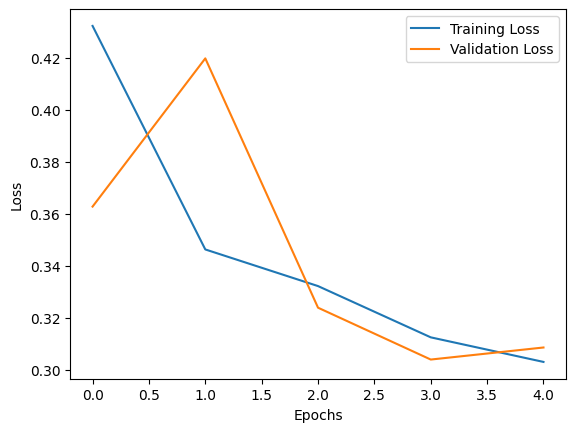

In [151]:
import matplotlib.pyplot as plt
history = sentiment_model.history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [146]:
model.save("sentiment_model.h5")

In [148]:
# Evaluate on test set
loss, acc = sentiment_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {acc:.3f}")


310/310 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8767 - loss: 0.3100
Test Loss: 0.310
Test Accuracy: 0.877


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example sentence
text = " it was really a good movie "

# Convert it to sequence
seq = tokenizer.texts_to_sequences([text]) 
# tokenizer object will create unique word list and assign them a unique value .
#  texts_to_sequences this class will replace the word with their unique value . 

# Pad to the same length as training data
padded = pad_sequences(seq, maxlen=200, padding='pre') 
# makes the input same size as training data input 

# Predict
pred = sentiment_model.predict(padded)

if pred > 0.5:
    print("Positive Review 😀")
else:
    print("Negative Review 😞")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Positive Review 😀
